In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')


from SALib.sample import saltelli
from SALib.analyze import sobol

import scipy 
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('/Users/casper/Documents/TU Della/Thesis/Finals Docs/Experiments/Sensi analysis/Final model Walk sensi-table.csv', skiprows=6 ) 



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000030 entries, 0 to 3000029
Data columns (total 49 columns):
 #   Column                                          Dtype  
---  ------                                          -----  
 0   [run number]                                    int64  
 1   walking-radius                                  int64  
 2   prob-of-violating-rules                         int64  
 3   new-car-treshold                                float64
 4   number-of-cars-company0                         int64  
 5   graduated-sanctions                             bool   
 6   car-sharing-demand                              int64  
 7   number-of-companies                             int64  
 8   collective-choice-arrangement                   bool   
 9   One-company                                     bool   
 10  number-of-cars-company1                         int64  
 11  sanctioning-multiple                            int64  
 12  speed                       

In [4]:
df.rename(columns={'[run number]':'run number','[step]':'tick', '[ satisfied-users ] of company 0':'satisfied company 0',  '[ satisfied-users ] of company 1':'satisfied company 1', '[ satisfied-users ] of company 2': 'satisfied company 2', '[ unsatisfied-users ] of company 0':'unsatisfied company 0',  '[ unsatisfied-users ] of company 1':'unsatisfied company 1', '[ unsatisfied-users ] of company 2': 'unsatisfied company 2', 'count cars with [ ( company-id = company 0 ) ]': 'cars company 0', 'count cars with [ ( company-id = company 1 ) ]': 'cars company 1', 'count cars with [ ( company-id = company 2 ) ]': 'cars company 2'  }, inplace= True) 
df ['total satisfied users'] = df['satisfied company 0'] + df['satisfied company 1'] + df['satisfied company 2'] 
df ['total unsatisfied users'] = df['unsatisfied company 0'] + df['unsatisfied company 1'] + df['unsatisfied company 2'] 
df ['total no parking found'] = df['[ no-parking ] of company 0'] + df['[ no-parking ] of company 1'] + df['[ no-parking ] of company 2']
df ['total profit'] = df[ '[ profit ] of company 0'] + df[ '[ profit ] of company 1'] + df[ '[ profit ] of company 2'] 
df.rename(columns={ '[ no-parking ] of company 0': 'no parking company 0', '[ no-parking ] of company 1': 'no parking company 1', '[ no-parking ] of company 2': 'no parking company 2', '[ company-price ] of company 0': 'price company 0', '[ company-price ] of company 1': 'price company 1', '[ company-price ] of company 2': 'price company 2', '[ profit ] of company 0': 'profit company 0', '[ profit ] of company 1': 'profit company 1', '[ profit ] of company 2': 'profit company 2'}, inplace= True)

In [5]:
df1 = df.drop(columns=['prob-of-violating-rules', 'number-of-cars-company0', 'number-of-cars-company1', 'number-of-cars-company2', 'number-of-companies', 'One-company', 'speed', '[ vote ] of company 0', '[ vote ] of company 1', '[ vote ] of company 2', 'prob-of-sanctioning', '[ company-rules-violated ] of company 0', '[ company-rules-violated ] of company 1', '[ company-rules-violated ] of company 2', '[ company-sanctioned ] of company 0', '[ company-sanctioned ] of company 1', '[ company-sanctioned ] of company 2', 'car-sharing-demand'])

In [6]:
list(df1.columns)

['run number',
 'walking-radius',
 'new-car-treshold',
 'graduated-sanctions',
 'collective-choice-arrangement',
 'sanctioning-multiple',
 'starting-bottom-price',
 'tick',
 'satisfied company 0',
 'unsatisfied company 0',
 'satisfied company 1',
 'unsatisfied company 1',
 'satisfied company 2',
 'unsatisfied company 2',
 'price company 0',
 'price company 1',
 'price company 2',
 'profit company 0',
 'profit company 1',
 'profit company 2',
 'cars company 0',
 'cars company 1',
 'cars company 2',
 'count users',
 'market-price',
 'bottom-price',
 'count cars with [ available = true ]',
 'count patches with [ empty = true ]',
 'no parking company 0',
 'no parking company 1',
 'no parking company 2',
 'total satisfied users',
 'total unsatisfied users',
 'total no parking found',
 'total profit']

In [7]:
df1.head(5)

,run number,walking-radius,new-car-treshold,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,starting-bottom-price,tick,satisfied company 0,unsatisfied company 0,...,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
0,3,1,0.5,True,True,20,10,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
1,3,1,0.5,True,True,20,10,1,0,0,...,9.997,600,489,0,0,0,0,1,0,0.0
2,3,1,0.5,True,True,20,10,2,0,1,...,9.996,600,489,0,0,0,0,2,0,0.0
3,1,1,0.5,True,True,20,10,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
4,3,1,0.5,True,True,20,10,3,0,1,...,9.999,600,489,0,0,0,0,2,0,0.0


In [8]:
df2 = df1.loc[df1['walking-radius'] == 1 ]
df2.head(5)

,run number,walking-radius,new-car-treshold,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,starting-bottom-price,tick,satisfied company 0,unsatisfied company 0,...,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
0,3,1,0.5,True,True,20,10,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
1,3,1,0.5,True,True,20,10,1,0,0,...,9.997,600,489,0,0,0,0,1,0,0.0
2,3,1,0.5,True,True,20,10,2,0,1,...,9.996,600,489,0,0,0,0,2,0,0.0
3,1,1,0.5,True,True,20,10,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
4,3,1,0.5,True,True,20,10,3,0,1,...,9.999,600,489,0,0,0,0,2,0,0.0


In [9]:
df3 = df1.loc[df1['walking-radius'] == 3 ]
df3.head(5)

,run number,walking-radius,new-car-treshold,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,starting-bottom-price,tick,satisfied company 0,unsatisfied company 0,...,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
789254,11,3,0.5,True,True,20,10,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
789257,11,3,0.5,True,True,20,10,1,0,0,...,9.997,600,489,0,0,0,0,0,0,0.0
789261,11,3,0.5,True,True,20,10,2,0,0,...,9.994,600,489,0,0,0,0,1,0,0.0
789265,11,3,0.5,True,True,20,10,3,0,0,...,9.991,600,489,0,0,0,0,1,0,0.0
789269,11,3,0.5,True,True,20,10,4,0,0,...,9.990,600,489,0,0,0,0,1,0,0.0


In [10]:
df4 = df1.loc[df1['walking-radius'] == 5 ]
df4.head(5)

,run number,walking-radius,new-car-treshold,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,starting-bottom-price,tick,satisfied company 0,unsatisfied company 0,...,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
1943745,21,5,0.5,True,True,20,10,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
1943749,21,5,0.5,True,True,20,10,1,0,0,...,9.997,600,489,0,0,0,0,0,0,0.0
1943753,21,5,0.5,True,True,20,10,2,0,0,...,9.996,599,490,0,0,0,0,0,0,0.0
1943757,21,5,0.5,True,True,20,10,3,0,0,...,9.995,599,490,0,0,0,0,0,0,0.0
1943760,21,5,0.5,True,True,20,10,4,0,0,...,9.992,599,490,0,0,0,0,1,0,0.0


In [11]:
df2_mean = df2['market-price'].mean()
print(df2_mean)
df2_std = df2['market-price'].std()
print(df2_std)

9.82049056476095
0.7250776181598421


In [12]:
df3_mean = df3['market-price'].mean()
print(df3_mean)
df3_std = df3['market-price'].std()
print(df3_std)

86.75417715657946
41.01817189096904


In [13]:
df4_mean = df4['market-price'].mean()
print(df4_mean)
df4_std = df4['market-price'].std()
print(df4_std)

503.74613659830254
282.79036029034455


Text(0, 0.5, 'Combined company profits')

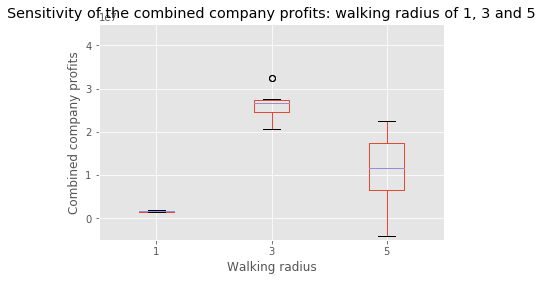

In [19]:
plot = df1.loc[df1['tick'] == 100000].boxplot(column=['total profit'], by=['walking-radius'])
plt.ylim(- 5000000, 45000000 )
plot.get_figure().gca().set_title("Sensitivity of the combined company profits: walking radius of 1, 3 and 5")
plot.get_figure().suptitle('')
plot.get_figure().gca().set_xlabel("Walking radius")
plot.get_figure().gca().set_ylabel("Combined company profits")

Text(0, 0.5, 'Total satisfied users')

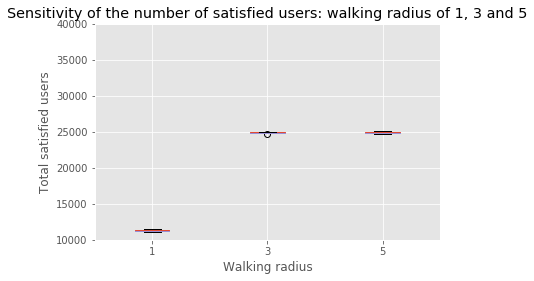

In [21]:
plot = df1.loc[df1['tick'] == 100000].boxplot(column=['total satisfied users'], by=['walking-radius'])
plt.ylim(10000, 40000 )
plot.get_figure().gca().set_title("Sensitivity of the number of satisfied users: walking radius of 1, 3 and 5")
plot.get_figure().suptitle('')
plot.get_figure().gca().set_xlabel("Walking radius")
plot.get_figure().gca().set_ylabel("Total satisfied users")

Text(0, 0.5, 'Total unsatisfied users')

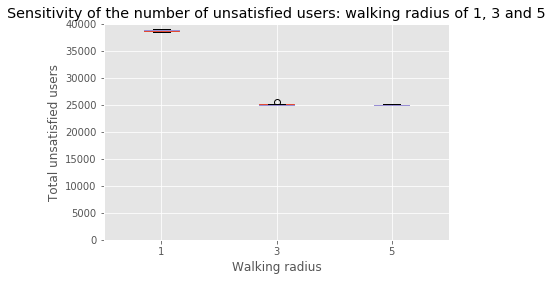

In [25]:
plot = df1.loc[df1['tick'] == 100000].boxplot(column=['total unsatisfied users'], by=['walking-radius'])
plt.ylim(0000, 40000 )
plot.get_figure().gca().set_title("Sensitivity of the number of unsatisfied users: walking radius of 1, 3 and 5")
plot.get_figure().suptitle('')
plot.get_figure().gca().set_xlabel("Walking radius")
plot.get_figure().gca().set_ylabel("Total unsatisfied users")

Text(0, 0.5, 'Number of times no parking was found')

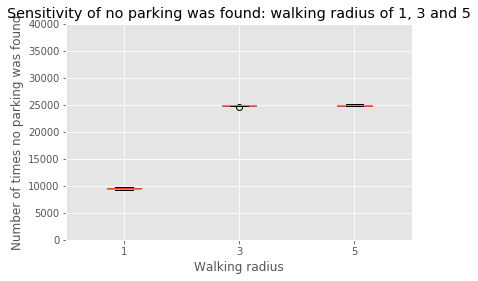

In [26]:
plot = df1.loc[df1['tick'] == 100000].boxplot(column=['total no parking found'], by=['walking-radius'])
plt.ylim(0000, 40000 )
plot.get_figure().gca().set_title("Sensitivity of no parking was found: walking radius of 1, 3 and 5")
plot.get_figure().suptitle('')
plot.get_figure().gca().set_xlabel("Walking radius")
plot.get_figure().gca().set_ylabel("Number of times no parking was found")